In [1]:
# install libraries
!pip install requests
!pip install bs4
!pip install lxml

In [2]:
# import packages
# analyse the data
import pandas as pd

# get data from internet
import requests     #access internet gather html files etc.

# parsing data with BeautifulSoup
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.worldometers.info/coronavirus/'

page = requests.get(url)     #use request page to lead this url

# make contact with website
page

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
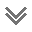

In [4]:
if page.status_code == 200:     # check if connection is ok then contunie
    html_doc = page.text

# look at the html code
soup = BeautifulSoup(html_doc)
print(soup.prettify())

In [5]:
# find the table elements
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

# show all the tables
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [6]:
rows = table.find_all('tr')
print(rows)

[<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>, <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:lef

In [7]:
# all of the headers of the table
header = table.find_all("th")

# view the header
header

[<th width="1%">#</th>,
 <th width="100">Country,<br/>Other</th>,
 <th width="20">Total<br/>Cases</th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">New<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Serious,<br/>Critical</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

In [8]:
# all of the data of the table
data = table.find_all("td")

# view the data
data

[<td></td>,
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>,
 <td>104,599,820</td>,
 <td>+16,133</td>,
 <td>1,484,880</td>,
 <td>+24</td>,
 <td>98,220,931</td>,
 <td>+5,189</td>,
 <td>4,894,009</td>,
 <td>8,435</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="North America" style="display:none;">North America</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>,
 <td>160,371,169</td>,
 <td>+20,580</td>,
 <td>1,437,690</td>,
 <td>+26</td>,
 <td>154,649,114</td>,
 <td>+20,324</td>,
 <td>4,284,365</td>,
 <td>10,504</td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td data-continent="Asia" style="display:none;">Asia</td>,
 <td>
 </td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td></td>,
 <td style="text-align:left;">
 <nobr>South America</nobr>
 </td>,
 <td>59,150,036</td>,
 <td></td>,
 <td>1,303,292</t

In [9]:
# storage for the extracted data
output = []

column_names = ['ID',
                'Country',
                'Total Cases',
                'New Cases',
                'Total Deaths',
                'New Deaths',
                'Total Recovered',
                'New Recovered',
                'Active Cases',
                'Serious/Critical Cases',
                'Total Cases/1M Pop',
                'Total Test',
                'Test/1M Pop',
                'Population']

# create a for loop statement
for country in rows:
    country_data = country.find_all("td")     # we are using find all because anticipating more than one data
    if country_data:
        # extract the text within each element
        country_text = [td.text for td in country_data]
        output.append(dict(zip(column_names, country_text)))
        # creating the dics. Zip takes 2 lists/tuples in equal length, combine them in dic as key:value 
      
# create output
output

[{'ID': '',
  'Country': '\nNorth America\n',
  'Total Cases': '104,599,820',
  'New Cases': '+16,133',
  'Total Deaths': '1,484,880',
  'New Deaths': '+24',
  'Total Recovered': '98,220,931',
  'New Recovered': '+5,189',
  'Active Cases': '4,894,009',
  'Serious/Critical Cases': '8,435',
  'Total Cases/1M Pop': '',
  'Total Test': '',
  'Test/1M Pop': '',
  'Population': ''},
 {'ID': '',
  'Country': '\nAsia\n',
  'Total Cases': '160,371,169',
  'New Cases': '+20,580',
  'Total Deaths': '1,437,690',
  'New Deaths': '+26',
  'Total Recovered': '154,649,114',
  'New Recovered': '+20,324',
  'Active Cases': '4,284,365',
  'Serious/Critical Cases': '10,504',
  'Total Cases/1M Pop': '',
  'Total Test': '',
  'Test/1M Pop': '',
  'Population': ''},
 {'ID': '',
  'Country': '\nSouth America\n',
  'Total Cases': '59,150,036',
  'New Cases': '',
  'Total Deaths': '1,303,292',
  'New Deaths': '',
  'Total Recovered': '56,116,936',
  'New Recovered': '+7,927',
  'Active Cases': '1,729,808',
  'S

In [10]:
# create DataFrame directly from output
data = pd.DataFrame(output)
pd.set_option("display.max_rows", None)

# view DataFrame
data

ID                 Country  Total Cases New Cases Total Deaths  \
0              \nNorth America\n  104,599,820   +16,133    1,484,880   
1                       \nAsia\n  160,371,169   +20,580    1,437,690   
2              \nSouth America\n   59,150,036              1,303,292   
3                     \nEurope\n  201,427,340              1,852,266   
4                    \nOceania\n    9,559,224   +23,346       13,699   
5                     \nAfrica\n   12,278,413                255,725   
6                           \n\n          721                     15   
7                          World  547,386,723   +60,059    6,347,567   
8      1                     USA   88,566,961             1,040,236    
9      2                   India   43,365,016               524,941    
10     3                  Brazil   31,963,736               669,958    
11     4                  France   30,434,451               149,268    
12     5                 Germany   27,573,585               140,560    
13     6                      UK   22,576,354               179,859    
14     7                  Russia   18,409,651               380,711    
15     8                S. Korea   18,312,993    +7,210      24,498    
16     9                   Italy   18,071,634               167,967    
17    10                  Turkey   15,085,742                98,996    
18    11                   Spain   12,613,634               107,604    
19    12                 Vietnam   10,740,595                43,084    
20    13               Argentina    9,341,492               129,016    
21    14                   Japan    9,191,098                31,077    
22    15             Netherlands    8,147,612                22,350    
23    16               Australia    7,943,123   +23,346       9,599    
24    17                    Iran    7,235,696               141,377    
25    18                Colombia    6,131,657               139,918    
26    19               Indonesia    6,074,825               156,706    
27    20                  Poland    6,012,289               116,405    
28    21                  Mexico    5,923,086   +16,133     325,511    
29    22                Portugal    5,109,412                23,995    
30    23                 Ukraine    5,015,994               108,622    
31    24                    DPRK    4,696,580   +11,020          73    
32    25                Malaysia    4,549,847                35,742    
33    26                Thailand    4,509,541    +2,313      30,562    
34    27                 Austria    4,361,919                18,749    
35    28                  Israel    4,275,795                10,911    
36    29                 Belgium    4,197,345                31,868    
37    30            South Africa    3,990,057               101,704    
38    31                 Czechia    3,927,267                40,310    
39    32                  Canada    3,926,613                41,865    
40    33                   Chile    3,924,247                58,335    
41    34             Switzerland    3,708,891                13,979    
42    35             Philippines    3,698,509                60,495    
43    36                    Peru    3,605,614               213,425    
44    37                  Greece    3,583,526                30,141    
45    38                  Taiwan    3,487,599                 5,817    
46    39                 Denmark    3,004,493                 6,436    
47    40                 Romania    2,915,487                65,726    
48    41                  Sweden    2,515,769                19,060    
49    42                    Iraq    2,335,436                25,229    
50    43                  Serbia    2,024,455                16,119    
51    44              Bangladesh    1,960,528                29,135    
52    45                 Hungary    1,925,083                46,626    
53    46                Slovakia    1,793,369                20,142    
54    47                  Jordan    1,697,271 

In [11]:
# Creating df for country data
data_continent=data.iloc[0:6]
data_continent

ID            Country  Total Cases New Cases Total Deaths New Deaths  \
0     \nNorth America\n  104,599,820   +16,133    1,484,880        +24   
1              \nAsia\n  160,371,169   +20,580    1,437,690        +26   
2     \nSouth America\n   59,150,036              1,303,292              
3            \nEurope\n  201,427,340              1,852,266              
4           \nOceania\n    9,559,224   +23,346       13,699        +41   
5            \nAfrica\n   12,278,413                255,725              

  Total Recovered New Recovered Active Cases Serious/Critical Cases  \
0      98,220,931        +5,189    4,894,009                  8,435   
1     154,649,114       +20,324    4,284,365                 10,504   
2      56,116,936        +7,927    1,729,808                 10,371   
3     193,012,280        +3,349    6,562,794                  5,861   
4       9,210,226                    335,299                    151   
5      11,465,638                    557,050                  1,025   

  Total Cases/1M Pop Total Test Test/1M Pop Population  
0                                                       
1                                                       
2                                                       
3                                                       
4                                                       
5

In [12]:
# Creating df for country data
data_country= data.drop(data.index[0:8])
data_country=data_country.drop(data.index[238:])
data_country

ID                 Country Total Cases New Cases Total Deaths  \
8      1                     USA  88,566,961             1,040,236    
9      2                   India  43,365,016               524,941    
10     3                  Brazil  31,963,736               669,958    
11     4                  France  30,434,451               149,268    
12     5                 Germany  27,573,585               140,560    
13     6                      UK  22,576,354               179,859    
14     7                  Russia  18,409,651               380,711    
15     8                S. Korea  18,312,993    +7,210      24,498    
16     9                   Italy  18,071,634               167,967    
17    10                  Turkey  15,085,742                98,996    
18    11                   Spain  12,613,634               107,604    
19    12                 Vietnam  10,740,595                43,084    
20    13               Argentina   9,341,492               129,016    
21    14                   Japan   9,191,098                31,077    
22    15             Netherlands   8,147,612                22,350    
23    16               Australia   7,943,123   +23,346       9,599    
24    17                    Iran   7,235,696               141,377    
25    18                Colombia   6,131,657               139,918    
26    19               Indonesia   6,074,825               156,706    
27    20                  Poland   6,012,289               116,405    
28    21                  Mexico   5,923,086   +16,133     325,511    
29    22                Portugal   5,109,412                23,995    
30    23                 Ukraine   5,015,994               108,622    
31    24                    DPRK   4,696,580   +11,020          73    
32    25                Malaysia   4,549,847                35,742    
33    26                Thailand   4,509,541    +2,313      30,562    
34    27                 Austria   4,361,919                18,749    
35    28                  Israel   4,275,795                10,911    
36    29                 Belgium   4,197,345                31,868    
37    30            South Africa   3,990,057               101,704    
38    31                 Czechia   3,927,267                40,310    
39    32                  Canada   3,926,613                41,865    
40    33                   Chile   3,924,247                58,335    
41    34             Switzerland   3,708,891                13,979    
42    35             Philippines   3,698,509                60,495    
43    36                    Peru   3,605,614               213,425    
44    37                  Greece   3,583,526                30,141    
45    38                  Taiwan   3,487,599                 5,817    
46    39                 Denmark   3,004,493                 6,436    
47    40                 Romania   2,915,487                65,726    
48    41                  Sweden   2,515,769                19,060    
49    42                    Iraq   2,335,436                25,229    
50    43                  Serbia   2,024,455                16,119    
51    44              Bangladesh   1,960,528                29,135    
52    45                 Hungary   1,925,083                46,626    
53    46                Slovakia   1,793,369                20,142    
54    47                  Jordan   1,697,271                14,068    
55    48                 Georgia   1,659,371                16,839    
56    49                 Ireland   1,587,385                 7,437    
57    50                Pakistan   1,532,732                30,385    
58    51                  Norway   1,442,891                 3,280    
59    52               Singapore   1,390,558                 1,408    
60    53              Kazakhstan   1,306,056                13,663    
61    54             New Zealand   1,294,657                 1,380    
62    55               Hong Kong   1,232,306                 9,398    
63    56                 Moroc

In [13]:
# Writing df as csv
data_country.to_csv('Covid Worldometer_Country', index=False)
data_continent.to_csv('Covid Worldometer_Continent', index=False)

In [14]:
# Crosscheck work with reading data
covid_country=pd.read_csv('Covid Worldometer_Country')
covid_country

ID                 Country Total Cases New Cases Total Deaths  \
0      1                     USA  88,566,961       NaN   1,040,236    
1      2                   India  43,365,016       NaN     524,941    
2      3                  Brazil  31,963,736       NaN     669,958    
3      4                  France  30,434,451       NaN     149,268    
4      5                 Germany  27,573,585       NaN     140,560    
5      6                      UK  22,576,354       NaN     179,859    
6      7                  Russia  18,409,651       NaN     380,711    
7      8                S. Korea  18,312,993    +7,210      24,498    
8      9                   Italy  18,071,634       NaN     167,967    
9     10                  Turkey  15,085,742       NaN      98,996    
10    11                   Spain  12,613,634       NaN     107,604    
11    12                 Vietnam  10,740,595       NaN      43,084    
12    13               Argentina   9,341,492       NaN     129,016    
13    14                   Japan   9,191,098       NaN      31,077    
14    15             Netherlands   8,147,612       NaN      22,350    
15    16               Australia   7,943,123   +23,346       9,599    
16    17                    Iran   7,235,696       NaN     141,377    
17    18                Colombia   6,131,657       NaN     139,918    
18    19               Indonesia   6,074,825       NaN     156,706    
19    20                  Poland   6,012,289       NaN     116,405    
20    21                  Mexico   5,923,086   +16,133     325,511    
21    22                Portugal   5,109,412       NaN      23,995    
22    23                 Ukraine   5,015,994       NaN     108,622    
23    24                    DPRK   4,696,580   +11,020          73    
24    25                Malaysia   4,549,847       NaN      35,742    
25    26                Thailand   4,509,541    +2,313      30,562    
26    27                 Austria   4,361,919       NaN      18,749    
27    28                  Israel   4,275,795       NaN      10,911    
28    29                 Belgium   4,197,345       NaN      31,868    
29    30            South Africa   3,990,057       NaN     101,704    
30    31                 Czechia   3,927,267       NaN      40,310    
31    32                  Canada   3,926,613       NaN      41,865    
32    33                   Chile   3,924,247       NaN      58,335    
33    34             Switzerland   3,708,891       NaN      13,979    
34    35             Philippines   3,698,509       NaN      60,495    
35    36                    Peru   3,605,614       NaN     213,425    
36    37                  Greece   3,583,526       NaN      30,141    
37    38                  Taiwan   3,487,599       NaN       5,817    
38    39                 Denmark   3,004,493       NaN       6,436    
39    40                 Romania   2,915,487       NaN      65,726    
40    41                  Sweden   2,515,769       NaN      19,060    
41    42                    Iraq   2,335,436       NaN      25,229    
42    43                  Serbia   2,024,455       NaN      16,119    
43    44              Bangladesh   1,960,528       NaN      29,135    
44    45                 Hungary   1,925,083       NaN      46,626    
45    46                Slovakia   1,793,369       NaN      20,142    
46    47                  Jordan   1,697,271       NaN      14,068    
47    48                 Georgia   1,659,371       NaN      16,839    
48    49                 Ireland   1,587,385       NaN       7,437    
49    50                Pakistan   1,532,732       NaN      30,385    
50    51                  Norway   1,442,891       NaN       3,280    
51    52               Singapore   1,390,558       NaN       1,408    
52    53              Kazakhstan   1,306,056       NaN      13,663    
53    54             New Zealand   1,294,657       NaN       1,380    
54    55               Hong Kong   1,232,306       NaN       9,398    
55    56                 Moroc

In [15]:
# Crosscheck work with reading data
covid_continent=pd.read_csv('Covid Worldometer_Continent')
covid_continent

ID            Country  Total Cases New Cases Total Deaths  New Deaths  \
0 NaN  \nNorth America\n  104,599,820   +16,133    1,484,880        24.0   
1 NaN           \nAsia\n  160,371,169   +20,580    1,437,690        26.0   
2 NaN  \nSouth America\n   59,150,036       NaN    1,303,292         NaN   
3 NaN         \nEurope\n  201,427,340       NaN    1,852,266         NaN   
4 NaN        \nOceania\n    9,559,224   +23,346       13,699        41.0   
5 NaN         \nAfrica\n   12,278,413       NaN      255,725         NaN   

  Total Recovered New Recovered Active Cases Serious/Critical Cases  \
0      98,220,931        +5,189    4,894,009                  8,435   
1     154,649,114       +20,324    4,284,365                 10,504   
2      56,116,936        +7,927    1,729,808                 10,371   
3     193,012,280        +3,349    6,562,794                  5,861   
4       9,210,226           NaN      335,299                    151   
5      11,465,638           NaN      557,050                  1,025   

   Total Cases/1M Pop  Total Test  Test/1M Pop  Population  
0                 NaN         NaN          NaN         NaN  
1                 NaN         NaN          NaN         NaN  
2                 NaN         NaN          NaN         NaN  
3                 NaN         NaN          NaN         NaN  
4                 NaN         NaN          NaN         NaN  
5                 NaN         NaN          NaN         NaN